
# Predição de Cancelamento do Preços de Passagens ✈️

**Elis Coimbra de Moura** ♥

**Contextualização do caso:**

 O problema  consiste em uma empresa de viagens
 que gostaria de melhorar os seus resultados financeiros atuando no índice de cancelamento de passagens compradas, para isso ela necessita entender o perfil dos usuários com maior propensão a cancelamento e indicar esses possíveis clientes no momento da venda de uma nova passagem.

 **Objetivos:**

 A análise tem como objetivo responder as seguintes questões:

 **1)** Quais as características que aumentam o risco de um cancelamento?

 **2)** Proponha uma maneira de indicar clientes com alto risco de cancelamento no momento de uma venda.


**Dados:**

O conjunto de dados Travel Ticket Cancellations for Risk Management disponibilizado via Kaggle pelo link:
https://www.kaggle.com/datasets/pkdarabi/classification-of-travel-purpose?resource=download .

 O conjunto possui 101017 registros com 22 atributos que podem ser traduzidos  no dicionário de dados abaixo:

$\bullet$ Created: horário de registro do ticket.

$\bullet$ CancelTime: hora em que o passageiro cancelou a passagem, se aplicável.

$\bullet$ DepartureTime: horário de partida programado para a viagem.

$\bullet$ BillID: o identificador exclusivo da transação de compra.

$\bullet$ TicketID: o identificador exclusivo do ticket.

$\bullet$ ReserveStatus:  o status do pagamento do cliente.

$\bullet$ UserID: o identificador exclusivo do usuário.

Male: indica se o bilhete pertence ou não a um passageiro do sexo masculino.

$\bullet$ Price: o preço do bilhete sem descontos.

$\bullet$ CouponDiscount: desconto aplicado pelo passageiro na passagem.

$\bullet$ From: a origem da viagem.

$\bullet$ To: o destino da viagem.

$\bullet$ Domestic: Indica se a viagem é nacional ou internacional.

$\bullet$ VehicleType: especifica detalhes sobre o meio de transporte.

$\bullet$ VehicleClass: indica se o veículo é de primeira classe ou não.

$\bullet$ Vehicle: especifica o tipo de veículo.

$\bullet$ Cancel: indica se o ticket foi cancelado ou não.

$\bullet$ HashPassportNumber_p: versão com hash do número do passaporte.

$\bullet$ HashEmail: versão com hash do endereço de e-mail.

$\bullet$ BuyerMobile: versão com hash do número do celular do comprador.

$\bullet$ NationalCode: versão hash do número de identificação nacional.

$\bullet$ TripReason: o motivo da viagem.

**Etapas|Resumo:**

**1)** Limpeza dos Dados.

**2)** Análise Exploratória dos Dados.

**3)** Pré-Processamento dos Dados.

**4)** Aplicação de Algoritmos de Classificação.


# **Bibliotecas:**

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
dados = pd.read_csv('train_data.csv', parse_dates=['Created','DepartureTime','CancelTime'], encoding='utf-8')
print ('O conjunto de dados possui', dados.shape[0], 'linhas e', dados.shape[1], 'colunas' )

O conjunto de dados possui 101017 linhas e 22 colunas


In [3]:
dados.head()

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-10-23 09:38:49.110,NaT,2022-11-02 23:59:00,39710203,1091777.0,5,122885.0,True,6600000.0,34425.0,...,1,NaN,False,Work,Plane,0,NaN,66c7f29e3b92f3b77e20830ac29e7758037a53d2238a5b...,764974891906,477368495
1,2022-08-15 14:51:43.160,NaT,2022-08-18 04:15:00,38689463,1070902.0,5,876925.0,True,9500000.0,0.0,...,1,NaN,False,Int,Plane,0,NaN,b24634843858a4175d03422aa9e7211ec3b9f3ce4c481c...,27479149496,15987669
2,2022-09-20 17:25:27.250,NaT,2022-09-21 11:00:00,39245173,7624237.0,3,916640.0,False,2000000.0,0.0,...,1,VIP 2+1,True,Work,Bus,0,NaN,NaN,323657282999,667640412
3,2022-06-25 11:32:53.980,NaT,2022-06-26 08:30:00,37957585,2867547.0,2,NaN,False,40000.0,0.0,...,1,3 ستاره اتوبوسي,NaN,Int,Train,0,NaN,NaN,169459057632,392476186
4,2022-06-01 11:30:53.633,NaT,2022-06-02 23:00:00,37584530,7212559.0,3,NaN,True,1130000.0,0.0,...,1,اسکانیا تک صندلی ۳۱نفره,True,Int,Bus,0,NaN,NaN,408595008421,79497837


In [4]:
dados.columns

Index(['Created', 'CancelTime', 'DepartureTime', 'BillID', 'TicketID',
       'ReserveStatus', 'UserID', 'Male', 'Price', 'CouponDiscount', 'From',
       'To', 'Domestic', 'VehicleType', 'VehicleClass', 'TripReason',
       'Vehicle', 'Cancel', 'HashPassportNumber_p', 'HashEmail', 'BuyerMobile',
       'NationalCode'],
      dtype='object')

In [5]:
#conferindo que não existem dados duplicados
dados.duplicated().sum()
dados[dados.duplicated()]

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
76089,2022-07-28 12:05:44.417,NaT,2022-08-08 21:40:00,38454499,7452955.0,3,NaN,False,1225000.0,0.0,...,1,SCANIA VIP 2+1 / شارژر یو اس بی / برق 220 ولت...,True,Int,Bus,0,NaN,NaN,623769789061,155777031
82091,2022-08-04 15:20:33.203,NaT,2022-08-06 04:40:00,38559562,1067895.0,5,735707.0,True,5870000.0,80000.0,...,1,NaN,False,Int,Plane,0,NaN,f65a8fac658175a186bbdfb03786c02e702d5df5c400af...,731735664474,804373868


In [6]:
dados.isna().sum()

Created                      0
CancelTime               85691
DepartureTime                0
BillID                       0
TicketID                     0
ReserveStatus                0
UserID                   58474
Male                         0
Price                        0
CouponDiscount               0
From                         0
To                           0
Domestic                     0
VehicleType               7544
VehicleClass             38450
TripReason                   0
Vehicle                      0
Cancel                       0
HashPassportNumber_p    100155
HashEmail                57933
BuyerMobile                  0
NationalCode                 0
dtype: int64

Pode-se observar a coluna "HashPassportNumber_p" relativa ao número do passaporte é uma coluna que possui muitos valores ausentes, provavelmente devido o pequeno número de voos internacionais no dataset, e além disso não é relevante para o problema do cancelamento de passagens, portanto iremos remove-la.

As colunas "BillID, "TicketID", "UserID","HashEmail", "NationalCode","HashNUmber" e "BuyerMobile" são colunas que sozinhas não nos fornecem informações sobre usuário e sobre seu cancelamento de passagens, portanto também iremos remove-las.

In [7]:
dados.drop(['Created','CancelTime', 'DepartureTime','BillID','TicketID','UserID','HashPassportNumber_p','HashEmail', 'BuyerMobile','NationalCode', 'From', 'To', 'VehicleType','CancelTime'], axis =1, inplace = True)

In [8]:
print('Após a  remoção das colunas temos', dados.shape[1], 'colunas e ', dados.shape[0])

Após a  remoção das colunas temos 9 colunas e  101017


In [9]:
#verificando os valores únicos das colunas
for var in dados:
  print('Coluna', var, 'Tipo da coluna', dados[var].dtype)
  print('Valores únicos:', dados[var].unique(), '\n')

Coluna ReserveStatus Tipo da coluna int64
Valores únicos: [5 3 2 4] 

Coluna Male Tipo da coluna bool
Valores únicos: [ True False] 

Coluna Price Tipo da coluna float64
Valores únicos: [ 6600000.  9500000.  2000000. ... 12597000. 11948000.  7287000.] 

Coluna CouponDiscount Tipo da coluna float64
Valores únicos: [  34425.               0.           60000.         ...   16890.
 1666666.66666667   84240.        ] 

Coluna Domestic Tipo da coluna int64
Valores únicos: [1 0] 

Coluna VehicleClass Tipo da coluna object
Valores únicos: [False True nan] 

Coluna TripReason Tipo da coluna object
Valores únicos: ['Work' 'Int'] 

Coluna Vehicle Tipo da coluna object
Valores únicos: ['Plane' 'Bus' 'Train' 'InternationalPlane'] 

Coluna Cancel Tipo da coluna int64
Valores únicos: [0 1] 



Primeiramente vamos transformar os valores booleanos em numéricos  utilizando um dicionário.

In [10]:
name_columns_categ =['Male']
dic ={True : 1, False :0}

dados['Male']= dados[['Male']].replace(dic)

In [11]:
dados.head()

,ReserveStatus,Male,Price,CouponDiscount,Domestic,VehicleClass,TripReason,Vehicle,Cancel
0,5,1,6600000.0,34425.0,1,False,Work,Plane,0
1,5,1,9500000.0,0.0,1,False,Int,Plane,0
2,3,0,2000000.0,0.0,1,True,Work,Bus,0
3,2,0,40000.0,0.0,1,NaN,Int,Train,0
4,3,1,1130000.0,0.0,1,True,Int,Bus,0


De uma maneira similar tentei utilizar um método para transformar a coluna Vehicle Class para numérica, mas o método não conseguiu detectar os 'nan's


In [12]:
dados.loc[dados['VehicleClass']== True,'VehicleClass']= 1
dados.loc[dados['VehicleClass']== False,'VehicleClass']= 0
dados.loc[dados['VehicleClass']== np.nan, 'VehicleClass']= dados['Vehicle'].median

Podemos verificar aqui que a coluna ainda continuou com os nan

In [13]:
dados['VehicleClass'].unique()

array([0, 1, nan], dtype=object)

In [14]:
dados['VehicleClass'].isna().sum()

38450

Foi feita então a imputação manual dos valores das medianas no lugar dos valores nulos

In [15]:
# Por alguma razão os métodos SimpleImputer e semelhantes não conseguem encontrar as linhas em branco dessa coluna.
# O único método que encontra elas é o .isnull() e portanto fiz a troca de valores manual.
mdvc = dados['VehicleClass'].median()
ind  = dados[dados['VehicleClass'].isnull()].index
for i in ind:
  dados.loc[dados['VehicleClass'].index == i, 'VehicleClass'] = mdvc

#verificando se funcionou.
dados['VehicleClass'].unique()


array([0, 1], dtype=object)

Transformando a coluna VehicleClass de objeto para float.

In [16]:
dados['VehicleClass'] = dados['VehicleClass'].astype(float)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ReserveStatus   101017 non-null  int64  
 1   Male            101017 non-null  int64  
 2   Price           101017 non-null  float64
 3   CouponDiscount  101017 non-null  float64
 4   Domestic        101017 non-null  int64  
 5   VehicleClass    101017 non-null  float64
 6   TripReason      101017 non-null  object 
 7   Vehicle         101017 non-null  object 
 8   Cancel          101017 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Utilizando o método do describe do pandas vamos verificar se existe alguma inconsistência nos dados numéricos

In [17]:
dados[['Price', 'CouponDiscount']].describe()

,Price,CouponDiscount
count,1.010170e+05,1.010170e+05
mean,3.203236e+06,4.777172e+03
std,7.349195e+06,6.127747e+04
min,-1.514000e+06,-2.000000e+03
25%,1.075000e+06,0.000000e+00
50%,1.690000e+06,0.000000e+00
75%,3.043500e+06,0.000000e+00
max,3.837646e+08,1.443333e+07


Observando melhor as linhas verificamos que existem valores negativos para o preço e o cupom de desconto o que não faz muito sentido. Pode ser possivelmente algum erro de digitação/inserção.

In [18]:
dados[dados['Price']< 0]

,ReserveStatus,Male,Price,CouponDiscount,Domestic,VehicleClass,TripReason,Vehicle,Cancel
6612,4,1,-1514000.0,0.0,1,1.0,Int,Train,1


In [19]:
dados[dados['CouponDiscount']<0]

,ReserveStatus,Male,Price,CouponDiscount,Domestic,VehicleClass,TripReason,Vehicle,Cancel
10041,2,0,70000.0,-2000.0,1,1.0,Work,Train,0


Vist que são apenas duas linhas, vamos fazer a transformação manual de tais inconsistências. Poderíamos remover as linhas mas vamos mudar estes valores para positivo multiplicando por -1.

In [20]:
dados.loc[dados['Price']< 0, 'Price'] = dados['Price']*-1

In [21]:
dados.loc[dados['CouponDiscount'] <0, 'CouponDiscount'] = dados['CouponDiscount']*-1

In [22]:
#verificando se funcionou
dados[['Price', 'CouponDiscount']].describe()

,Price,CouponDiscount
count,1.010170e+05,1.010170e+05
mean,3.203266e+06,4.777212e+03
std,7.349182e+06,6.127747e+04
min,0.000000e+00,0.000000e+00
25%,1.075000e+06,0.000000e+00
50%,1.690000e+06,0.000000e+00
75%,3.043500e+06,0.000000e+00
max,3.837646e+08,1.443333e+07


In [23]:
dados.isna().sum()

ReserveStatus     0
Male              0
Price             0
CouponDiscount    0
Domestic          0
VehicleClass      0
TripReason        0
Vehicle           0
Cancel            0
dtype: int64

In [24]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101017 entries, 0 to 101016
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ReserveStatus   101017 non-null  int64  
 1   Male            101017 non-null  int64  
 2   Price           101017 non-null  float64
 3   CouponDiscount  101017 non-null  float64
 4   Domestic        101017 non-null  int64  
 5   VehicleClass    101017 non-null  float64
 6   TripReason      101017 non-null  object 
 7   Vehicle         101017 non-null  object 
 8   Cancel          101017 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


#**Análise Exploratória**

## **Estatística Descritiva**

O describe fornece as seguintes informações:

**Moda:** valor mais frequente utilizada para valores nominais

**Média aritmética Simples:** Soma dos valores dividido pelo número de elementos

**Mediana:** Valor central do conjunto de valores  quando ordenado de forma crescente. Em caso de número par, coincide com a média.

**Variância:** Distância quadrática média em relação a média.

**Desvio Padrão:** Medida de Dispersão em torno da média da variável


In [25]:
dados[['Price', 'CouponDiscount']].describe()

,Price,CouponDiscount
count,1.010170e+05,1.010170e+05
mean,3.203266e+06,4.777212e+03
std,7.349182e+06,6.127747e+04
min,0.000000e+00,0.000000e+00
25%,1.075000e+06,0.000000e+00
50%,1.690000e+06,0.000000e+00
75%,3.043500e+06,0.000000e+00
max,3.837646e+08,1.443333e+07


O describe nos sugere que há uma grande variação no conjuntos de Preço e Cupons de Desconto, e devemos levar isso em consideração quando for aplicado os algoritmos de machine learning.

In [26]:
dados[['Male', 'TripReason','Vehicle']].describe(exclude=np.number)

,TripReason,Vehicle
count,101017,101017
unique,2,4
top,Work,Bus
freq,56448,48960


##**Associações entre Variáveis Categóricas**
Na análise exploratória fiz algumas perguntas para as associações entre as variáveis qualitativa e a variável cancelamento.

**1)** Será que os cancelamentos das passagens ocorrem com mais frequência dependendo do sexo?

**2)** Será que o cancelamento ocorrem com mais frequência  em vôos nacionais ou internacionais?

**3)** Será que o cancelamento ocorrem com mais frequência  em qual tipo de transporte?

**4)** Será que o cancelamento ocorrem com mais frequência  em viagens que tem qual motivo para ocorrer?

**5)** Será que o cancelamento ocorrem com mais frequência  em viagens de primeira classe ?

Respondendo essas perguntas iremos detectar quais as principais características que aumentam o risco de  um cancelamento.


Hipóteses no teste Qui Quadrado:

H0 não a associação entre as duas variáveis, ou seja, as variáveis linhas e colunas são independentes

Ha:existe uma associação entre as duas variáveis, ou seja, as variáveis de linha e coluna são dependentes

###**Variáveis:  Male x Cancel**

O atributo **'Male'** assume os valores:

*   **1:** indicando sexo masculino
*   **0:** indicando sexo feminino

Para analisarmos se existe uma associação entre as variáveis, vamos utilizar o teste qui-quadrado.

In [27]:
homemCancelou = ((dados[(dados['Male'] == True) & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['Male'] == True].shape[0])
mulherCancelou = ((dados[(dados['Male'] == False) & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['Male'] == False].shape[0])
print('Porcentagem de mulheres que cancelaram uma passagem:', mulherCancelou,'\nPorcentagem de Homens que cancelaram uma passagem:', homemCancelou)


Porcentagem de mulheres que cancelaram uma passagem: 14.964860460378896 
Porcentagem de Homens que cancelaram uma passagem: 15.287067778767511


Visto que a porcentagem de homens que cancelaram é muito próxima da porcentagem de mulheres que cancelaram, temos as seguintes hipóteses para o teste Qui-Quadrado:

**$H_0$:** Não existe uma associação entre as duas variáveis, isto é o sexo não influencia no cancelamento.

**$H_a$:** Existe uma associação entre as duas variáveis, isto é, sexo influencia no cancelamento.

In [28]:
cross_tab = pd.crosstab(dados['Male'], dados['Cancel'])
cross_tab

Cancel,0,1
Male,,
0,33395,5877
1,52306,9439


In [29]:
stats.chi2_contingency(cross_tab)
chi, p, dof, exp = stats.chi2_contingency(cross_tab)

In [30]:
print(chi, p.round(2))

1.9124297553056135 0.17


Como o valor de  p é 0.17 podemos aceitar a hipótese nula, o que significa que não temos uma associação entre sexo e cancelamento da passagem.

Text(0.5, 1.0, 'Cancel X Gender')

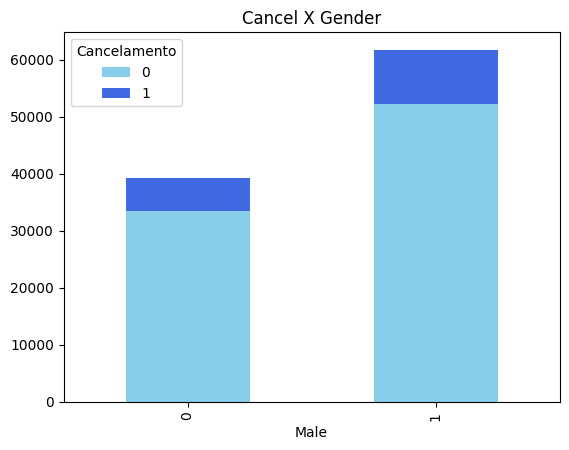

In [31]:
tabela_dupla = pd.crosstab(index= dados['Male'], columns = dados['Cancel'])
tabela_dupla.plot.bar(color =['#87CEEB', '#4169E1'], stacked = True)
plt.legend (title = 'Cancelamento')
plt.title("Cancel X Gender")

Com uma análise do gráfico não é possível perceber uma grande diferença de proporção de cancelamentos entre homens e mulheres, o que coincide com a nossa conclusão analítica pelo método qui-quadrado.


##**Variáveis: Domestic x Cancel**

O atributo **'Domestic'** assume os valores:

*   **1** indicando viagens nacionais
*   **0:** indicando viagens internacionais

Para analisarmos se existe uma associação entre as variáveis será utilizado o teste qui-quadrado

In [32]:
nacioCancelou = ((dados[(dados['Domestic'] == 1) & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['Domestic'] == 1].shape[0])
interCancelou = ((dados[(dados['Domestic'] == 0) & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['Domestic'] == 0].shape[0])
print('Porcentagem de ticket de viagens nacionais canceladas:', nacioCancelou, '\nPorcentagem de ticket de viagens internacionais canceladas:', interCancelou)

Porcentagem de ticket de viagens nacionais canceladas: 15.21721777653609 
Porcentagem de ticket de viagens internacionais canceladas: 8.176100628930818



Visto que a diferença de porcentagem é significativa mas a diferença de vendas entre passagens nacionais e internacionais também é, não podemos concluir apenas pelas porcentagens que há uma associação entre as duas variáveis. Temos as hipóteses:

**$H_0$:** Não existe uma associação entre as duas variáveis, isto é o tipo de voo não influencia no cancelamento.

**$H_a$:** Existe uma associação entre as duas variáveis, isto é, o tipo de voo influencia no cancelamento.

In [33]:
cross_tab = pd.crosstab(dados['Domestic'], dados['Cancel'])
cross_tab

Cancel,0,1
Domestic,,
0,730,65
1,84971,15251


In [34]:
stats.chi2_contingency(cross_tab)
chi, p, dof, exp = stats.chi2_contingency(cross_tab)

In [35]:
print(chi, p.round(18))

29.85527897783816 4.6552762072e-08


Como o valor de p é aproximadamente 0.00000005, rejeitamos a hipótese nula, o que significa que temos uma associação entre o tipo de voo e
cancelamento da passagem.

Text(0.5, 1.0, 'CancelX Domestic')

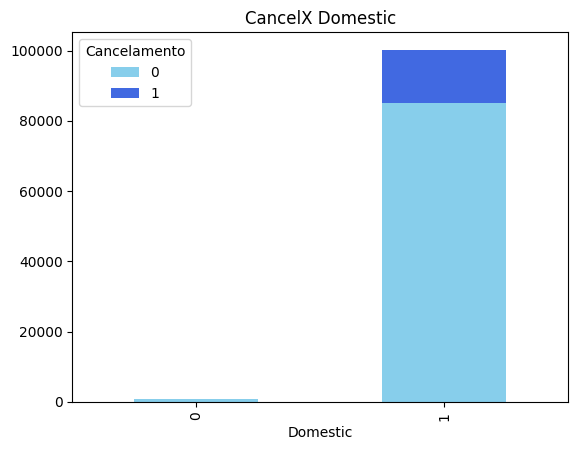

In [36]:
tabela_dupla = pd.crosstab(index= dados['Domestic'], columns = dados['Cancel'])
tabela_dupla.plot.bar(color =['#87CEEB', '#4169E1'], stacked = True)
plt.legend (title = 'Cancelamento')
plt.title("CancelX Domestic")

##**Variáveis: Vehicle x Cancel**

O atributo **'Vehicle'** especifica o qual o tipo de veículo utilizado naquele ticket/viagem e assume os valores:

*   **Bus:** indicando ônibus
*   **International Plane:** indicando aviões de voôs intenacionais
*   **Plane:** indicando aviões de voôs nacionais
*   **Train:** indicando trem



Para analisarmos se existe uma associação entre as variáveis será utilizado o teste qui-quadrado

In [37]:
busCancelou   = ((dados[(dados['Vehicle'] == 'Bus') & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['Vehicle'] == 'Bus'].shape[0])
interCancelou = ((dados[(dados['Vehicle'] == 'InternationalPlane') & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['Vehicle'] == 'InternationalPlane'].shape[0])
aviaoCancelou = ((dados[(dados['Vehicle'] == 'Plane') & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['Vehicle'] == 'Plane'].shape[0])
tremCancelou  = ((dados[(dados['Vehicle'] == 'Train') & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['Vehicle'] == 'Train'].shape[0])

print('Porcentagem de tickets de ônibus cancelados:', busCancelou, '\nPorcentagem de tickets de voos internacionais cancelados:', interCancelou, '\nPorcentagem de tickets de voos nacionais cancelados:', aviaoCancelou, '\nPorcentagem de tickets de trem cancelados:', tremCancelou)

Porcentagem de tickets de ônibus cancelados: 13.280228758169935 
Porcentagem de tickets de voos internacionais cancelados: 8.176100628930818 
Porcentagem de tickets de voos nacionais cancelados: 12.87855135810178 
Porcentagem de tickets de trem cancelados: 18.4629388816645


Podemos observar que o cancelamento de viagens nacionais está, de certa forma, bem distribuído entre ônibus, avião e trem. Em outras palavras, as porcentagens não diferem tanto, mesmo os cancelamentos de trem tendo um percentual maior. Vamos assumir as hipóteses:

**$H_0$:** Não existe uma associação entre as duas variáveis, isto é o tipo de transporte não influencia no cancelamento.

**$H_a$:** Existe uma associação entre as duas variáveis, isto é, o tipo de transporte influencia no cancelamento.

In [38]:
cross_tab = pd.crosstab(dados['Vehicle'], dados['Cancel'])
cross_tab

Cancel,0,1
Vehicle,,
Bus,42458,6502
InternationalPlane,730,65
Plane,11162,1650
Train,31351,7099


In [39]:
stats.chi2_contingency(cross_tab)
chi, p, dof, exp = stats.chi2_contingency(cross_tab)

In [40]:
print(chi, p)

542.5879765072932 2.8086090067668294e-117


Visto que o valor de p é menor que 0,05 rejeitamos a hipótese nula, isto é, existe uma associação entre o tipo de transporte e o cancelamento.

Text(0.5, 1.0, 'Cancel x Vehicle')

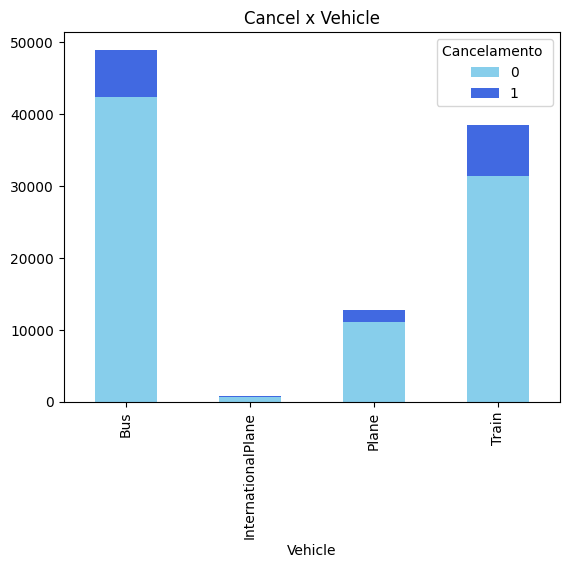

In [41]:
tabela_dupla = pd.crosstab(index= dados['Vehicle'], columns = dados['Cancel'])
tabela_dupla.plot.bar(color =['#87CEEB', '#4169E1'], stacked = True)
plt.legend (title = 'Cancelamento ')
plt.title("Cancel x Vehicle")

### **Variáveis: TripReason x Cancel**

O atributo **'TripReason'** especifica o motivo da viagem e assume os valores:

*   **Work:** viagem a trabalho
*   **Int:** viagem por outros motivos


Para analisarmos se existe uma associação entre as variáveis será utilizado o teste qui-quadrado

In [42]:
WorkCancelou = ((dados[(dados['TripReason'] == 'Work') & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['TripReason'] == 'Work'].shape[0])
IntCancelou  = ((dados[(dados['TripReason'] == 'Int') & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['TripReason'] == 'Int'].shape[0])
print('Porcentagem de cancelamentos de viagem a trabalho: ', WorkCancelou, '\nPorcentagem de cancelamentos de viagem por outros motivos: ', IntCancelou)

Porcentagem de cancelamentos de viagem a trabalho:  14.647108843537415 
Porcentagem de cancelamentos de viagem por outros motivos:  15.813682155758487


Visto que não existe uma grande entre as porcentagens de cancelamentos de viagens por trabalho ou por outros motivos, temos as seguintes hipóteses para o teste Qui-Quadrado:

H0 : Não existe uma associação entre as duas variáveis, isto é o motivo da viagem não influencia no cancelamento.

Ha : Existe uma associação entre as duas variáveis, isto é, o motivo da viagem influencia no cancelamento.

In [43]:
cross_tab = pd.crosstab(dados['TripReason'], dados['Cancel'])
cross_tab

Cancel,0,1
TripReason,,
Int,37521,7048
Work,48180,8268


In [44]:
stats.chi2_contingency(cross_tab)
chi, p, dof, exp = stats.chi2_contingency(cross_tab)

In [45]:
print(chi, p.round(15))

26.258665255105168 2.98611949e-07


Como p é aproximadadmente 0.0000003, a hipótese nula é rejeitada, logo há uma associação entre o motivo do voo e o cancelamento. Pelos dados númericos e as porcentagens, viagens a trabalho são menos canceladas do que viagens por outros motivos. Aqui percebemos que foi bom utilizar o método qui-quadrado pois as porcentagens pareciam indicar o contrário.

Text(0.5, 1.0, 'CancelX Trip Reason')

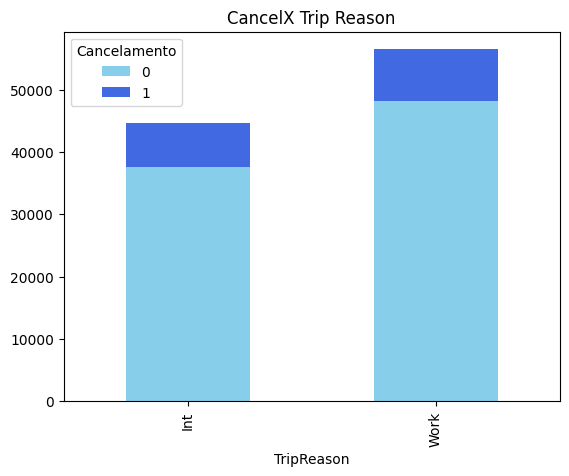

In [46]:
tabela_dupla = pd.crosstab(index= dados['TripReason'], columns = dados['Cancel'])
tabela_dupla.plot.bar(color =['#87CEEB', '#4169E1'], stacked = True)
plt.legend (title = 'Cancelamento')
plt.title("CancelX Trip Reason")

##**Variáveis VehicleClass X Cancel**

O atributo **'VehicleClass'** indica se a viagem é de primeira classe ou não, assumindo os valores:

*   **0:** para veículos que não são de primeira classe
*   **1:** para veículos de primeira clase


Para analisarmos se existe uma associação entre as variáveis será utilizado o teste qui-quadrado.


In [47]:
primeiraClasseCancelou = ((dados[(dados['VehicleClass'] == True) & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['VehicleClass'] == True].shape[0])
economicaCancelou      = ((dados[(dados['VehicleClass'] == False) & (dados['Cancel']== 1)].shape[0])*100)/(dados[dados['VehicleClass'] == False].shape[0])
print('Porcentagem de viagens de primeira classe canceladas: ', primeiraClasseCancelou, '\nPorcentagem de viagens econômicas canceladas: ', economicaCancelou)

Porcentagem de viagens de primeira classe canceladas:  15.664495459310475 
Porcentagem de viagens econômicas canceladas:  12.513959548331059


Como não há uma grande diferença de porcentagem entre as viagens de primeira classe canceladas e as viagens canceladas, temos as seguintes hipóteses para o teste Qui-Quadrado:

$H_0$ : Não existe uma associação entre as duas variáveis, isto é a classe da viagem não influencia no cancelamento.

$H_a$ : Existe uma associação entre as duas variáveis, isto é, a classe da viagem influencia no cancelamento.

In [48]:
cross_tab = pd.crosstab(dados['VehicleClass'], dados['Cancel'])
cross_tab

Cancel,0,1
VehicleClass,,
0.0,14101,2017
1.0,71600,13299


In [51]:
stats.chi2_contingency(cross_tab)
chi, p, dof, exp = stats.chi2_contingency(cross_tab)

In [52]:
print(chi, p)


104.28638408497403 1.7508810821165896e-24


Como o valor de p é menor que 0,05 a hipótese nula é rejeitada, isto é, a classe do voo está associada ao cancelamento. Visto que o número de viagens de primeira classe é muito menor que o número de viagens econômicas, é difícil inferir qual tem mais chances de cancelamento. Inferimos, devido a proporção de viagens econômicas no total de viagens, que as viagens econômicas tem mais chances de serem canceladas.

Text(0.5, 1.0, 'Cancel X VehicleClass')

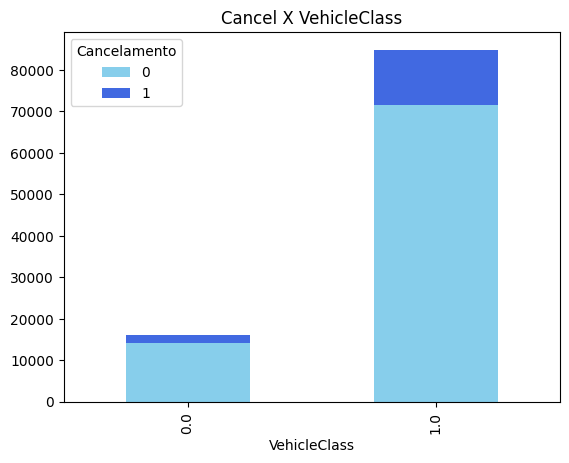

In [53]:
tabela_dupla = pd.crosstab(index= dados['VehicleClass'], columns = dados['Cancel'] )
tabela_dupla.plot.bar(color =['#87CEEB', '#4169E1'], stacked = True,)
plt.legend (title = 'Cancelamento')
plt.title("Cancel X VehicleClass")

#**Conclusão:**

A partir dos teste aplicados acima nas variáveis categórica, obtemos característica que influenciam no cancelamento. As variáveis categoricas que estão associadas ao Cancel são Vehicle, VehicleClass, Domestic e TripReason. As viagens de trem, as viagens econômicas, as viagens nacionais e as viagens que não são a trabalho possuem uma maior chance de cancelamento comparadas com os outros possíveis valores das variáveis categóricas.

#**Análise das Variáveis Quantitativas e a Variável Cancel**

<Axes: xlabel='Cancel', ylabel='Price'>

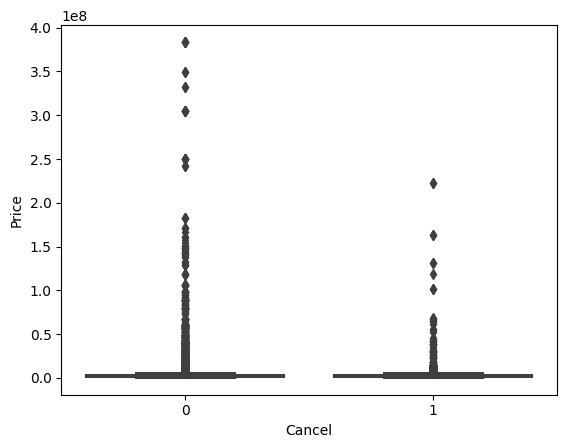

In [54]:
sns.boxplot(x = 'Cancel', y = dados['Price'], data = dados)

O gráfico dos preços das passagens com relação ao cancelamento indica visualmente que passagens mais caras tendem a ser canceladas com menos frequência do que passagens mais baratas. Isto também pode ser inferido pela teste qui-quadrado que fizemos anteriormente no VehicleClass e passagens de primeira de classe tendem a ser mais caras. Mas não podemos concluir nada ainda, vamos tentar melhorar o plot removendo outliers com o método do desvio padrão e depois com o método do iqr.

Text(0.5, 1.0, 'Preço das Viagens Não Canceladas')

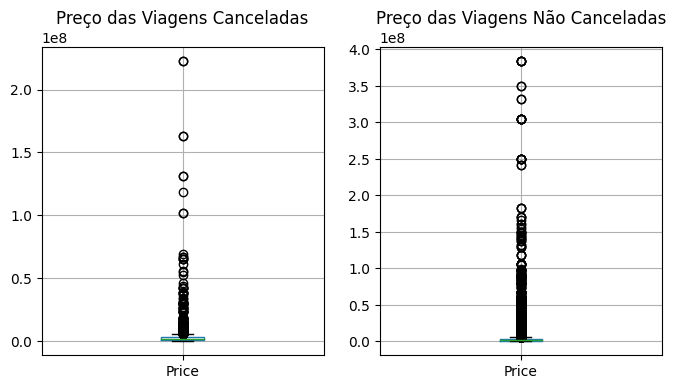

In [55]:
# Detectando Outliers segundo o desvio padrão.
desvio_padrao = dados['Price'].std()
media = dados['Price'].mean()
mediana = dados['Price'].median()

# Outliers
precosFora_std = dados[(dados['Price'] < media - (desvio_padrao*2))|(dados['Price'] > media + (desvio_padrao*2))]

# Inliers
precosDentro_stq = dados[(dados['Price'] >= media - (desvio_padrao*2))|(dados['Price'] <= media + (desvio_padrao*2))]

# gráficos dos preços das viagens canceladas e não canceladas no conjunto dos inliers
pDCancelados = precosDentro_stq[precosDentro_stq['Cancel']==1]
pDnaoCancelados = precosDentro_stq[precosDentro_stq['Cancel']==0]

plt.figure(figsize=(8,4))
plt.subplot(121)
pDCancelados.boxplot((['Price']))
plt.title('Preço das Viagens Canceladas')

plt.subplot(122)
pDnaoCancelados.boxplot(['Price']);
plt.title('Preço das Viagens Não Canceladas')


Mesmo após aplicar o método do desvio padrão, ainda não podemos concluir que há uma relação entre o preço e o cancelamento. Vamos aplicar o método do iqr.

Text(0.5, 1.0, 'Preço das Viagens Não Canceladas')

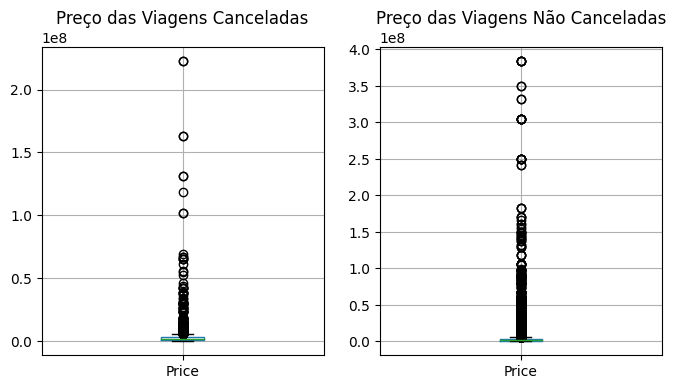

In [56]:
# Detectando Outliers segundo o iqr
Q1 = dados['Price'].quantile(0.25)
Q3 = dados['Price'].quantile(0.75)
IQR = Q3-Q1

# Outliers
precosFora_iqr = dados[(dados['Price'] < Q1 - (IQR*1.5))|(dados['Price'] > Q3 + (IQR*1.5))]

# Inliers
precosDentro_iqr = dados[(dados['Price'] >= Q1 - (IQR*1.5))|(dados['Price'] <= Q3 + (IQR*1.5))]

# plot dos preçoes das viagens canceladas e não canceladas
pDCancelados = precosDentro_iqr[precosDentro_iqr['Cancel']==1]
pDnaoCancelados = precosDentro_iqr[precosDentro_iqr['Cancel']==0]

plt.figure(figsize=(8,4))
plt.subplot(121)
pDCancelados.boxplot((['Price']))
plt.title('Preço das Viagens Canceladas')

plt.subplot(122)
pDnaoCancelados.boxplot(['Price']);
plt.title('Preço das Viagens Não Canceladas')




## **Conclusão** ##

Nenhum dos métodos acima nos permite concluir que há uma associação entre o preço e o cancelamento embora haja indícios que sim. Isto aconteceu porque a variação no preço das passagens é muito grande e mesmo removendo outliers a variação continou muito grande.


#Pré-processamento 🧹

Vamos utilizar técnicas de processamento diferente para as variáveis categóricas e numéricas, para isso vamos utilizar um pipeline diferente para cada tipo de variável.

In [57]:
dados.columns

Index(['ReserveStatus', 'Male', 'Price', 'CouponDiscount', 'Domestic',
       'VehicleClass', 'TripReason', 'Vehicle', 'Cancel'],
      dtype='object')

In [58]:
# separando variaveis preditoras e target, e separando entre treinamento e teste
X = dados[['ReserveStatus', 'Male', 'Price', 'CouponDiscount', 'Domestic','VehicleClass', 'TripReason', 'Vehicle']]
y = dados['Cancel']

x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70711, 8), (30306, 8), (70711,), (30306,))

In [61]:
# identificando as variáveis categóricas e estabelecendo as numéricas
var_categ =[coluna for coluna in x_train.columns if x_train[coluna].dtype.name =='object']
var_numerica =['ReserveStatus','Price', 'Male', 'CouponDiscount', 'VehicleClass', 'Domestic']

In [62]:
X.head()

,ReserveStatus,Male,Price,CouponDiscount,Domestic,VehicleClass,TripReason,Vehicle
0,5,1,6600000.0,34425.0,1,0.0,Work,Plane
1,5,1,9500000.0,0.0,1,0.0,Int,Plane
2,3,0,2000000.0,0.0,1,1.0,Work,Bus
3,2,0,40000.0,0.0,1,1.0,Int,Train
4,3,1,1130000.0,0.0,1,1.0,Int,Bus


In [63]:
pipeline_categorica = Pipeline ([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse= False))
])


In [64]:
pipeline_numericas = Pipeline([
    ('scaler', RobustScaler())
])

In [65]:
pre_processamento = ColumnTransformer([
    ('num', pipeline_numericas, var_numerica),
    ('cat', pipeline_categorica, var_categ)
])

#Aplicação de Modelos de Machine Learning

Primeiramente vejamos se a variável target Cancelamento está balanceada

In [66]:
dados['Cancel'].value_counts()

0    85701
1    15316
Name: Cancel, dtype: int64

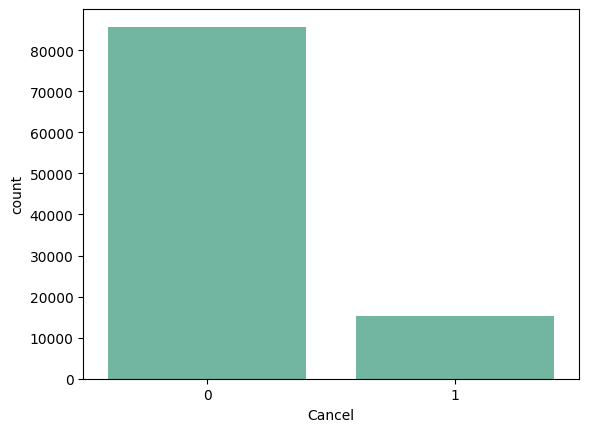

In [67]:
rgb_values = sns.color_palette("Set2", 6)
color_labels = dados['Cancel'].unique()
color_map = dict(zip(color_labels, rgb_values))
ax = sns.countplot(x ='Cancel', data = dados, palette=dados['Cancel'].map(color_map))


Pode-se notar que a variável cancelamento é uma variável desbalanceada por isso talvez não seja interessante utilizar a métrica de acurácia para comparara os modelo de machine learning e qual seria mais adequado.

A precisão e a revocação são as métricas que serão analisadas para a comparação dos modelos e são calculadas da seguinte forma

Precisão =$\frac{VP}{VP+FP}$ e a Revocação = $\frac{VP}{VP + FN}$.

No nosso caso estamos interessados em prever com classificar mais corretamente o cancelamento dos tickets de passagens para isso será necessário analisar a métrica de precisão temos interesse então em diminuir a quantidade de falsos positivos para que a precisão do modelo seja maior.


##**Aplicações de Modelos de Aprendizado de Máquina- Separação Hold Out**

## **Regressão Logística**

In [68]:
pipeline_log_regression = make_pipeline(pre_processamento, LogisticRegression())

In [69]:
pipeline_log_regression.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['ReserveStatus', 'Price',
                                                   'Male', 'CouponDiscount',
                                                   'VehicleClass',
                                                   'Domestic']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TripReason', 'Vehicle'])])),
                ('logisticregression', LogisticRegression())])

In [70]:
y_pred =pipeline_log_regression.predict(x_test)

In [71]:
pipeline_log_regression.score(x_test, y_test)

0.8488088167359599

In [72]:
target_names =['class 0','class 1']
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.85      1.00      0.92     25726
     class 1       0.00      0.00      0.00      4580

    accuracy                           0.85     30306
   macro avg       0.42      0.50      0.46     30306
weighted avg       0.72      0.85      0.78     30306



##**Naïve Bayes**

In [73]:
pipeline_naive_bayes = make_pipeline(pre_processamento, GaussianNB())

In [74]:
pipeline_naive_bayes.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['ReserveStatus', 'Price',
                                                   'Male', 'CouponDiscount',
                                                   'VehicleClass',
                                                   'Domestic']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TripReason', 'Vehicle'])])),
                ('gaussiannb', GaussianNB())])

In [75]:
y_pred = pipeline_naive_bayes.predict(x_test)

In [76]:
pipeline_naive_bayes.score(x_test, y_test)

0.8488748102685937

In [77]:
target_names =['class 0','class 1']
print(classification_report(y_test, y_pred, target_names= target_names, zero_division='warn'))

              precision    recall  f1-score   support

     class 0       0.85      1.00      0.92     25726
     class 1       0.00      0.00      0.00      4580

    accuracy                           0.85     30306
   macro avg       0.42      0.50      0.46     30306
weighted avg       0.72      0.85      0.78     30306



##**Random Forest**

In [78]:
pipeline_random_forest = make_pipeline(pre_processamento, RandomForestClassifier())

In [79]:
pipeline_random_forest.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['ReserveStatus', 'Price',
                                                   'Male', 'CouponDiscount',
                                                   'VehicleClass',
                                                   'Domestic']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['TripReason', 'Vehicle'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [80]:
pipeline_random_forest.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
pipeline_random_forest.score(x_test, y_test)

0.9811918431993665

In [82]:
target_names =['class 0','class 1']
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

     class 0       0.85      1.00      0.92     25726
     class 1       0.00      0.00      0.00      4580

    accuracy                           0.85     30306
   macro avg       0.42      0.50      0.46     30306
weighted avg       0.72      0.85      0.78     30306



Nota-se que a precisão dos algoritmos escolhidos da classe 1 que representa o cancelamento é 0 o que pode nos dizer que  a separação de treino e teste pelo método hold-out não está sendo muito efetivo. Abaixo vamos utilizar o método de divisão de treino e teste cross validation um método geralmente mais efetivo de separação.

##**Aplicações de Modelos de Aprendizado de Máquina- Cross Validation**

## **Regressão Logística**





In [88]:
# n_splits é o número de execuções do modelo
cross_validation = KFold(n_splits =10, shuffle = True, random_state= 42)
cross_validation

KFold(n_splits=10, random_state=42, shuffle=True)

In [89]:
pipeline_log_regression = make_pipeline(pre_processamento, LogisticRegression())
pipeline_log_regression.fit(x_train, y_train)
y_pred =pipeline_log_regression.predict(x_test)

In [104]:
scores = cross_val_score(pipeline_log_regression, X, y, cv = 10, scoring='precision' )
scores

array([0.        , 0.        , 0.        , 0.88830486, 0.        ,
       0.        , 0.        , 0.        , 0.89784946, 0.        ])

In [105]:
print("A precisão média do modelo de regressão logística é:",(scores.mean()*100).round(2))

A precisão média do modelo de regressão logística é: 17.86


##**Naïve Bayes**

In [106]:
scores =cross_val_score(pipeline_naive_bayes, X, y, cv =10, scoring='precision' )

In [107]:
print("A precisão média do modelo  naive bayes é:", scores.mean())

A precisão média do modelo de naive bayes é: 0.024


##**Random Forest**

In [113]:
scores = cross_val_score(pipeline_random_forest, X, y, cv =10, scoring='precision' )

In [114]:
print("A precisão média do modelo  random forest  é:", (scores.mean()*100).round(2))

A precisão média do modelo  random forest  é: 97.48


##**Conclusão:**

Baseado nas pontuações obtidas pelos algoritmos na modelagem acima, concluímos que os algoritmos de Random Forest possuí uma melhor precisão para classificar as vendas com maior risco de cancelamento no momento em que são realizadas. Ainda é possível fazer uma otimização dos hiperparâmetros para melhorar o desempenho dos modelos.

# Em andamento:
Alguns tópicos do projeto ainda podem ser explorados:
1. Análise Multivariada na parte de Análise Exploratória.
2. Aplicação de técnicas de melhoria dos hiperparâmetros.
3. Explorar o quanto a viagem está próxima influencia no cancelamento das passagens.